In [14]:
import pathlib
import numpy as np
from fastai.vision import ImageList,cnn_learner,models, get_transforms, imagenet_stats, error_rate


In [2]:
chrono_images_path = pathlib.Path('/Users/vedant/Documents/React Learning/Chrono_analyzer/code/images')

In [3]:
np.random.seed(42)

In [6]:
data = (ImageList.from_folder(chrono_images_path)
        .split_by_rand_pct()
        .label_from_re(r'.*\/(.+)-.+-.+.jpg')
        .databunch()
        .normalize(imagenet_stats)
        )
data

ImageDataBunch;

Train: LabelList (3107 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: CategoryList
zenith,cartier,seiko,patekphilippe,audemarspiguet
Path: /Users/vedant/Documents/React Learning/Chrono_analyzer/code/images;

Valid: LabelList (776 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: CategoryList
patekphilippe,audemarspiguet,audemarspiguet,rolex,jaegerlecoultre
Path: /Users/vedant/Documents/React Learning/Chrono_analyzer/code/images;

Test: None

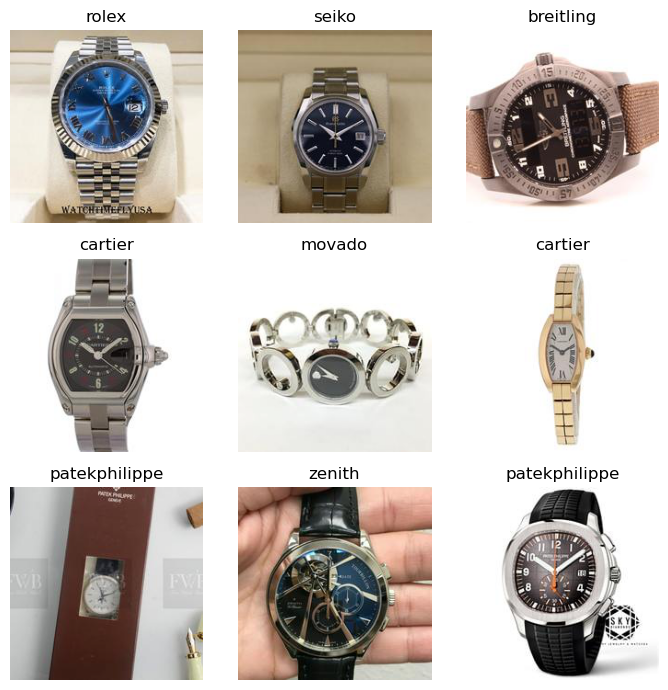

In [8]:
data.show_batch(rows=3, figsize=(7,7))

In [9]:
data.classes

['audemarspiguet',
 'breitling',
 'cartier',
 'gucci',
 'iwc',
 'jaegerlecoultre',
 'movado',
 'omega',
 'panerai',
 'patekphilippe',
 'rolex',
 'seiko',
 'zenith']

In [15]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

/Users/vedant/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/Users/vedant/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/vedant/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:08<00:00, 9.90MB/s]
[W NNPACK.cpp:

In [16]:
type(learner)

fastai.basic_train.Learner

In [18]:
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.911293,1.724509,0.512887,19:47
1,1.934912,1.439840,0.409794,15:06
2,1.400760,1.344370,0.391753,11:43
3,1.008831,1.256383,0.380155,13:48
4,0.792040,1.241658,0.373711,18:41
